# [OOP III: The Samuelson Accelerator](https://lectures.quantecon.org/py/samuelson.html)
##  1. Paul Samuelson’s (1939) multiplier-accelerator model
Samuelson使用二阶线性差分方程来表示一个基于三个组成部分的国家产出模型：  
- 1.国家产出：消费+投资+政府采购  
- 2.符合凯恩斯主义的消费函数：时间t时的消费量等于边际消费倾向乘以t-1期的国家产出  
- 3.investment accelerator：时间t时的投资额等于accelerator coefficient乘以t-2与t-1期的产出的差  
- 4.由消费+投资+政府采购得出的总产出得出总供给    

Samuelson用该模型分析了边际消费倾向和accelerator coefficient的特定值如何导致具有替代动态特性的国家产出中的短暂商业周期：  
- 1.平滑收敛到一个恒定的产出水平  
- 2.趋于特定值的商业周期  
- 3.没有太大的波动的持续的商业周期，  
结论：这使得国家产出受到二阶随机线性差分方程的控制，该方程在适当的参数值下引起反复的不规则商业周期。  

### Structure of the model
- $ {Gt}$ is a sequence of levels of government expenditures. We’ll start by setting $G_t = G,∀t$  ##国家采购  
-  ${Ct}$ is a sequence of levels of aggregate consumption expenditures, a key endogenous variable in the model  ##总消费，外生  
-  ${It}$ is a sequence of rates of investment, another key endogenous variable  ##投资额，外生  
- ${Yt}$ is a sequence of levels of national income, yet another endogenous variable  ##国民收入，外生  
- $ a$ is the marginal propensity to consume in the Keynesian consumption function $C_t = aY_{t−1} + γ$  ##消费函数，a表示边际消费倾向  
- $b$ is the “accelerator coefficient” in the “investment accelerator” $I_t = b (Y_{t-1} - Y_{t-2})$  ##投资函数，b表示投资乘数  
- ${ϵt}$ is an IID sequence standard normal random variables  ##标准正态随机变量  
- σ ≥ 0 is a “volatility” parameter — setting σ = 0 recovers the nonstochastic case that we’ll start with  ##波动率参数，初始值为0  

由$C_t = aY_{t−1} + γ$，  
$I_t = b(Y_{t−1} − Y_{t−2})$,  
$Y_t = C_t + I_t + G_t$   
可以得出：$Y_t = (a + b)Y_{t−1} − bY_{t−2} + (γ + G_t)$  
或者$Y_t = ρ_1Y_{t−1} + ρ_2Y_{t−2} + (γ + G_t)\tag{1.12}$
其中， $ρ_1 = (a + b)$ and $ρ_2 = −b $  
假设从$t=0$开始，赋予$Y$两个初始值：$Y_{−1} = \bar{Y}_{−1}$, $Y_{−2} = \bar{Y}_{−2}$  
We are interested in studying  
- the transient fluctuations in Yt as it converges to its steady state level  ##总产出的短期波动  
- the rate at which it converges to a steady state level  ##利率？  

### Stochastic version of the model    
我们可以通过对总需求增加一个随机冲击来将模型转换为持续不规则波动的模型  
在总需求方程右侧添加一个随机冲击，得到了二阶标量线性随机差分方程：$Y_t = G_t + a(1 − b)Y_{t−1} − abY_{t−2} + σϵt\tag{1.13}$

### Mathematical analysis of the model
初始， $G_t ≡ 0$, $σ = 0$, and $γ = 0$ （1.12）
变为$Y_t = ρ_1Y_{t−1} + ρ_2Y_{t−2}$或者$Y_{t+2} − ρ_1Y_{t+1} − ρ_2Y_t = 0\tag{1.14}$  
特征方程：$z^2 − ρ_1z − ρ_2\tag{1.15}$，  
 $z^2 − ρ_1z − ρ_2 = (z − λ_1)(z − λ_2) = 0\tag{1.16}$
对该特征方程进行求解，得到$λ_1$和$λ_2$（可能会是复数）  
注意：    
   1.模型设定时要使得$λ_1$和$λ_2$的绝对值均小于1  
   2.在两者绝对值都小于1的情况下，较大的λ值决定了模型随机模式下的收敛速度  

## 2 Let’s get to work

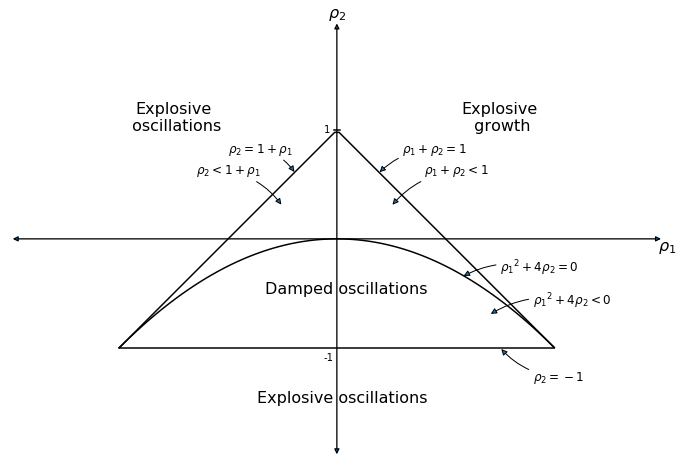

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def param_plot():
    """this function creates the graph on page 189 of Sargent Macroeconomic,→Theory, second edition, 1987"""
    fig, ax = plt.subplots(figsize=(12, 8))   ##产生一个子窗口，长度12单位，宽度8单位
    ax.set_aspect('equal')   ##将坐标轴的长度单位设为相等
    
    # Set axis   ##横轴和纵轴
    xmin, ymin = -3, -2            
    xmax, ymax = -xmin, -ymin
    plt.axis([xmin, xmax, ymin, ymax])
    
    # Set axis labels  ##设置坐标轴的标签
    ax.set(xticks=[], yticks=[])
    ax.set_xlabel(r'$\rho_2$', fontsize=16)
    ax.xaxis.set_label_position('top')    ##标签位置
    ax.set_ylabel(r'$\rho_1$', rotation=0, fontsize=16)
    ax.yaxis.set_label_position('right')
    
    # Draw (t1, t2) points
    rho1 = np.linspace(-2, 2, 100)  
    ax.plot(rho1, -abs(rho1) + 1, c='black')
    ax.plot(rho1, np.ones_like(rho1) * -1, c='black')  ##np.ones_like(rho1)：返回一个与rho1形状和类型一致的数组
    ax.plot(rho1, -(rho1**2 / 4), c='black') 
    
    # Turn normal axes off
    for spine in ['left', 'bottom', 'top', 'right']:   ##去掉上下左右的边框
        ax.spines[spine].set_visible(False)
        
    # Add arrows to represent axes   添加箭头
    axes_arrows = {'arrowstyle': '<|-|>', 'lw': 1.3}
    ax.annotate('', xy=(xmin, 0), xytext=(xmax, 0), arrowprops=axes_arrows)  
    ##''为注释文本内容 ，xy 为被注释的坐标点，xytext 为注释文字的坐标位置,arrowprops为箭头参数,参数类型为字典dict
    ax.annotate('', xy=(0, ymin), xytext=(0, ymax), arrowprops=axes_arrows)
    
    # Annotate the plot with equations   划线
    plot_arrowsl = {'arrowstyle': '-|>', 'connectionstyle': "arc3, rad=-0.2"}   ##字典格式
    plot_arrowsr = {'arrowstyle': '-|>', 'connectionstyle': "arc3, rad=0.2"}
    ax.annotate(r'$\rho_1 + \rho_2 < 1$', xy=(0.5, 0.3), xytext=(0.8, 0.6),
    arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'$\rho_1 + \rho_2 = 1$', xy=(0.38, 0.6), xytext=(0.6, 0.8),
    arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'$\rho_2 < 1 + \rho_1$', xy=(-0.5, 0.3), xytext=(-1.3, 0.6),
    arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'$\rho_2 = 1 + \rho_1$', xy=(-0.38, 0.6), xytext=(-1, 0.8),
    arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'$\rho_2 = -1$', xy=(1.5, -1), xytext=(1.8, -1.3),
    arrowprops=plot_arrowsl, fontsize='12')
    ax.annotate(r'${\rho_1}^2 + 4\rho_2 = 0$', xy=(1.15, -0.35),
    xytext=(1.5, -0.3), arrowprops=plot_arrowsr, fontsize='12')
    ax.annotate(r'${\rho_1}^2 + 4\rho_2 < 0$', xy=(1.4, -0.7),
    xytext=(1.8, -0.6), arrowprops=plot_arrowsr, fontsize='12')
    
    # Label categories of solutions    给解的分类加标签
    ax.text(1.5, 1, 'Explosive\n growth', ha='center', fontsize=16)   ##\n换行
    ax.text(-1.5, 1, 'Explosive\n oscillations', ha='center', fontsize=16)
    ax.text(0.05, -1.5, 'Explosive oscillations', ha='center', fontsize=16)
    ax.text(0.09, -0.5, 'Damped oscillations', ha='center', fontsize=16)
    
    # Add small marker to y-axis
    ax.axhline(y=1.005, xmin=0.495, xmax=0.505, c='black')
    ax.text(-0.12, -1.12, '-1', fontsize=10)
    ax.text(-0.12, 0.98, '1', fontsize=10)
    return fig
param_plot()
plt.show()

### Explanation of the graph
• ($λ_1$, $λ_2$) are complex with modulus less than 1 - in this case, the ${Y_t}$ sequence displays damped oscillations  阻尼振荡    
• ($λ_1$, $λ_2$) are both real, but one is strictly greater than 1 - this leads to explosive growth  爆炸增长      
• ($λ_1$, $λ_2$) are both real, but one is strictly less than −1 - this leads to explosive oscillations    爆炸震荡   
• ($λ_1$, $λ_2$) are both real and both are less than 1 in absolute value - in this case, there is smooth convergence to the steady state without damped cycles  平滑收敛    
Asiaphoria Meets Regression to the Mean，NBER Working Paper 20573，2014 亚洲欣快症  Summers 
我国的a和b可能与其他国家不一样

### Function to describe implications of characteristic polynomial   
特征多项式  

In [2]:
def categorize_solution(rho1, rho2):
    """this function takes values of rho1 and rho2 and uses them to classify,→the type of solution"""
    discriminant = rho1 ** 2 + 4 * rho2
    if rho2 > 1 + rho1 or rho2 < -1:
        print('Explosive oscillations')
    elif rho1 + rho2 > 1:
        print('Explosive growth')
    elif discriminant < 0:
        print('Roots are complex with modulus less than one; therefore damped oscillations')
    else:
        print('Roots are real and absolute values are less than zero;therefore get smooth convergence to a steady state')

In [3]:
### Test the categorize_solution function
categorize_solution(1.3, -.4)

Roots are real and absolute values are less than zero;therefore get smooth convergence to a steady state


### Function for plotting Yt paths

In [4]:
def plot_y(function=None):
    """function plots path of Y_t"""
    plt.subplots(figsize=(12, 8))
    plt.plot(function)
    plt.xlabel('Time $t$')
    plt.ylabel('$Y_t$', rotation=0)
    plt.grid()
    plt.show()

### Manual or “by hand” root calculations
#求解根的值  
方法一：  

rho_1 is  1.42
rho_2 is  -0.5
Two real roots: 
[-0.6459687576256715, -0.7740312423743284]
Absolute values of roots are less than one


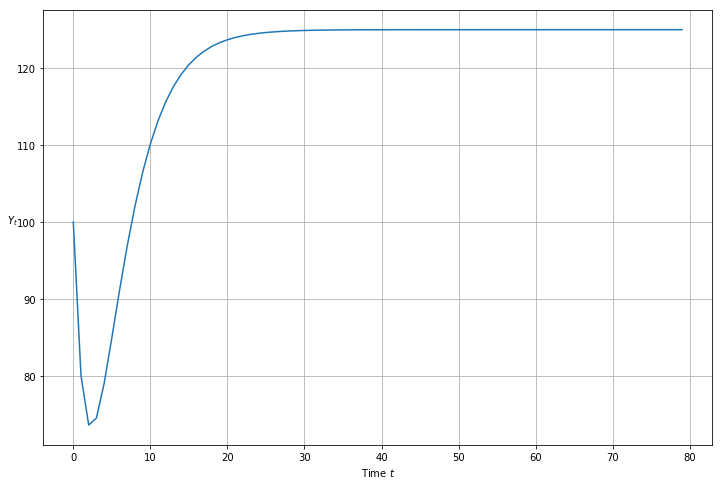

In [5]:
from cmath import sqrt
##=== This is a 'manual' method ===#
def y_nonstochastic(y_0=100, y_1=80, alpha=.92, beta=.5, gamma=10, n=80):
    """Takes values of parameters and computes roots of characteristic polynomial.  计算特征方程的解
    It tells whether they are real or complex and whether they are less than unity in absolute value.
    It also computes a simulation of length n starting from the two given initial conditions for national income"""
    roots = []
    rho1 = alpha + beta
    rho2 = -beta
    print('rho_1 is ', rho1)
    print('rho_2 is ', rho2)
    discriminant = rho1 ** 2 + 4 * rho2  ##判别式deta
    if discriminant == 0:
        roots.append(-rho1 / 2)
        print('Single real root: ')
        print(''.join(str(roots)))
    elif discriminant > 0:
        roots.append((-rho1 + sqrt(discriminant).real) / 2)  ##给列表赋值
        roots.append((-rho1 - sqrt(discriminant).real) / 2)
        print('Two real roots: ')
        print(''.join(str(roots)))
    else:
        roots.append((-rho1 + sqrt(discriminant)) / 2)
        roots.append((-rho1 - sqrt(discriminant)) / 2)
        print('Two complex roots: ')
        print(''.join(str(roots)))   ##join??
    if all(abs(root) < 1 for root in roots):
        print('Absolute values of roots are less than one')
    else:
        print('Absolute values of roots are not less than one')
    def transition(x, t): return rho1 * x[t - 1] + rho2 * x[t - 2] + gamma
    y_t = [y_0, y_1]
    for t in range(2, n):
        y_t.append(transition(y_t, t))
    return y_t
plot_y(y_nonstochastic())

### Reverse engineering 逆向工程 parameters to generate damped cycles

The next cell writes code that takes as inputs the modulus $r$ and phase $ϕ$ of a conjugate pair of complex numbers in polar form:  
    $λ_1 = r*exp(iϕ)$, $λ_2 = r*exp(−iϕ)$     ##复数时，解的形式  
The code assumes that these two complex numbers are the roots of the characteristic polynomial  

In [6]:
### code to reverse engineer a cycle
### y_t = r^t (c_1 cos(phi t) + c2 sin(phi t))
###
import cmath
import math
def f(r, phi):
    """
    Takes modulus r and angle phi of complex number r exp(j phi) and creates rho1 and rho2 of characteristic polynomial for which 
    r exp(j phi) and r exp(- j phi) are complex roots.
    Returns the multiplier coefficient a and the accelerator coefficient b that verifies those roots.
    """
    g1 = cmath.rect(r, phi) # Generate two complex roots
    g2 = cmath.rect(r, -phi)
    rho1 = g1 + g2 # Implied rho1, rho2
    rho2 = -g1 * g2
    b = -rho2 # Reverse engineer a and b that validate these
    a = rho1 - b
    return rho1, rho2, a, b
    ## Now let's use the function in an example
    ## Here are the example paramters
r = .95
period = 10 # Length of cycle in units of time
phi = 2 * math.pi/period
## Apply the function
rho1, rho2, a, b = f(r, phi)
print("a, b = ", a, b)
print("rho1, rho2 =", rho1, rho2)


a, b =  (0.6346322893124001+0j) (0.9024999999999999-0j)
rho1, rho2 = (1.5371322893124+0j) (-0.9024999999999999+0j)


In [7]:
## Print the real components of rho1 and rho2     根的实数部分
rho1 = rho1.real
rho2 = rho2.real
rho1, rho2


(1.5371322893124, -0.9024999999999999)

### Root finding using numpy
用numpy求解上述的根

In [8]:
r1, r2 = np.roots([1, -rho1, -rho2])  ##求根公式  【参数】
p1 = cmath.polar(r1)
p2 = cmath.polar(r2)
print("r, phi =", r, phi)
print("p1, p2 = ", p1, p2)
# print("g1, g2 = ", g1, g2)
print("a, b =", a, b)
print("rho1, rho2 =", rho1, rho2)


r, phi = 0.95 0.6283185307179586
p1, p2 =  (0.95, 0.6283185307179586) (0.95, -0.6283185307179586)
a, b = (0.6346322893124001+0j) (0.9024999999999999-0j)
rho1, rho2 = 1.5371322893124 -0.9024999999999999


Roots are complex with modulus less than one; therefore damped oscillations
Roots are [ 0.85+0.27838822j  0.85-0.27838822j]
Roots are complex
Roots are less than one


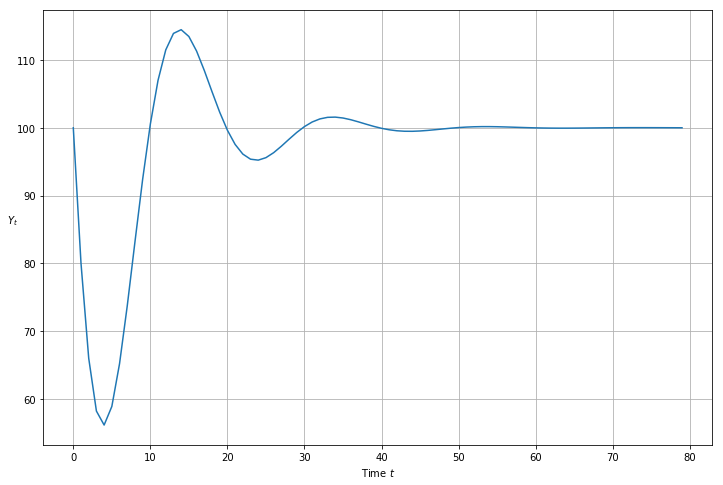

In [9]:
##=== This method uses numpy to calculate roots 阻尼震荡（中国式阻尼的决定因素） ===#
def y_nonstochastic(y_0=100, y_1=80, alpha=.9, beta=.8, gamma=10, n=80):
    """ Rather than computing the roots of the characteristic polynomial by
    ,→hand as we did earlier, this function
    enlists numpy to do the work for us """
    # Useful constants
    rho1 = alpha + beta
    rho2 = -beta
    categorize_solution(rho1, rho2)   # 判别delta 先前定义的函数
    # Find roots of polynomial
    roots = np.roots([1, -rho1, -rho2])
    print('Roots are', roots)
    # Check if real or complex
    if all(isinstance(root, complex) for root in roots):
        print('Roots are complex')
    else:
        print('Roots are real')
    # Check if roots are less than one
    if all(abs(root) < 1 for root in roots):
        print('Roots are less than one')
    else:
        print('Roots are not less than one')
    # Define transition equation
    def transition(x, t): return rho1 * x[t - 1] + rho2 * x[t - 2] + gamma
    # Set initial conditions
    y_t = [y_0, y_1]
    # Generate y_t series
    for t in range(2, n):
        y_t.append(transition(y_t, t))
    return y_t
plot_y(y_nonstochastic())


### Reverse engineered complex roots: example

a, b = 0.6180339887498949 1.0
Roots are complex with modulus less than one; therefore damped oscillations
Roots are [ 0.80901699+0.58778525j  0.80901699-0.58778525j]
Roots are complex
Roots are less than one


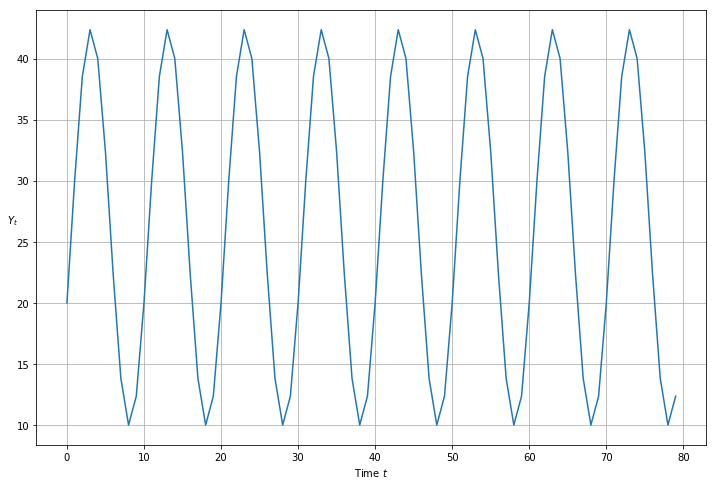

In [10]:
r = 1 # generates undamped, nonexplosive cycles
period = 10 # length of cycle in units of time
phi = 2 * math.pi/period
## Apply the reverse engineering function f
rho1, rho2, a, b = f(r, phi)
a = a.real # drop the imaginary part so that it is a valid input into y_
,→nonstochastic
b = b.real
print("a, b =", a, b)
ytemp = y_nonstochastic(alpha=a, beta=b, y_0=20, y_1=30)
plot_y(ytemp)


### Digression: using sympy to find roots

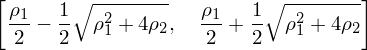

In [11]:
import sympy
from sympy import Symbol, init_printing
init_printing()
r1 = Symbol("rho_1")
r2 = Symbol("rho_2")
z = Symbol("z")
sympy.solve(z**2 - r1*z - r2, z)

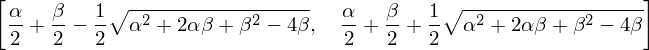

In [12]:
a = Symbol("alpha")
b = Symbol("beta")
r1 = a + b
r2 = -b
sympy.solve(z**2 - r1*z - r2, z)


## 3 Stochastic shocks
Now we’ll construct some code to simulate the stochastic version of the model that emerges when we add a random shock process to aggregate demand

Roots are real and absolute values are less than zero;therefore get smooth convergence to a steady state
[ 0.7236068  0.2763932]
Roots are real
Roots are less than one


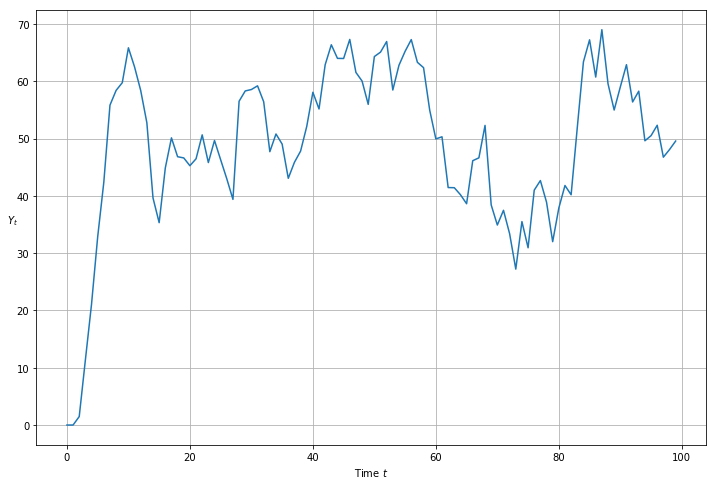

In [13]:
def y_stochastic(y_0=0, y_1=0, alpha=0.8, beta=0.2, gamma=10, n=100, sigma=5):
    """This function takes parameters of a stochastic version of the model and proceeds to analyze
    the roots of the characteristic polynomial and also generate a simulation"""
    # Useful constants
    rho1 = alpha + beta
    rho2 = -beta
    # Categorize solution
    categorize_solution(rho1, rho2)
    # Find roots of polynomial
    roots = np.roots([1, -rho1, -rho2])
    print(roots)
    # Check if real or complex
    if all(isinstance(root, complex) for root in roots):
        print('Roots are complex')
    else:
        print('Roots are real')
    # Check if roots are less than one
    if all(abs(root) < 1 for root in roots):
        print('Roots are less than one')
    else:
        print('Roots are not less than one')
    # Generate shocks
    epsilon = np.random.normal(0, 1, n)
    # Define transition equation 关注震荡的参数
    def transition(x, t): return rho1 * \
        x[t - 1] + rho2 * x[t - 2] + gamma + sigma * epsilon[t]
    # Set initial conditions
    y_t = [y_0, y_1]
    # Generate y_t series
    for t in range(2, n):
        y_t.append(transition(y_t, t))
    return y_t
plot_y(y_stochastic())


Let’s do a simulation in which there are shocks and the characteristic polynomial has complex roots。  
根是复数的形式  

a, b =  0.6346322893124001 0.9024999999999999
Roots are complex with modulus less than one; therefore damped oscillations
[ 0.76856614+0.55839599j  0.76856614-0.55839599j]
Roots are complex
Roots are less than one


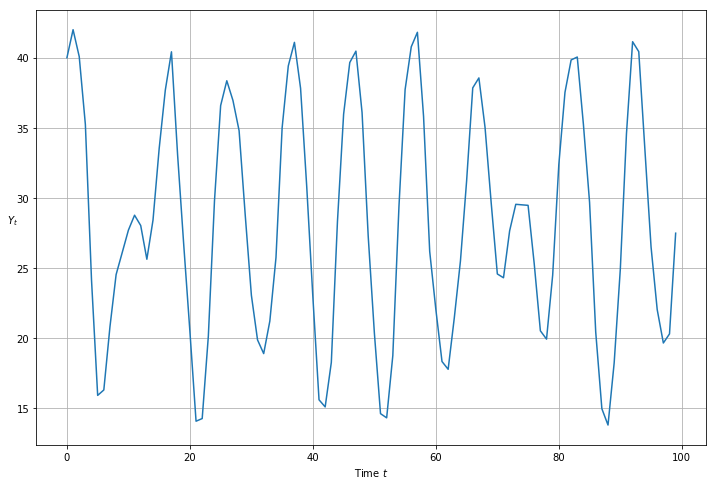

In [14]:
r = .95 # 决定是否收敛 均值由a,b决定
period = 10 # length of cycle in units of time
phi = 2 * math.pi/period
### apply the reverse engineering function f
rho1, rho2, a, b = f(r, phi)
a = a.real # drop the imaginary part so that it is a valid input into y_
,→nonstochastic
b = b.real
print("a, b = ", a, b)
plot_y(y_stochastic(y_0=40, y_1 = 42, alpha=a, beta=b, sigma=2, n=100))

## 4 Government spending

In [15]:
def y_stochastic_g(y_0=20,
                   y_1=20,
                   alpha=0.8,
                   beta=0.2,
                   gamma=10,
                   n=100,
                   sigma=2,
                   g=0,
                   g_t=0,
                   duration='permanent'):

    """This program computes a response to a permanent increase in government expenditures that occurs
       at time 20"""

    # Useful constants
    rho1 = alpha + beta
    rho2 = -beta

    # Categorize solution
    categorize_solution(rho1, rho2)

    # Find roots of polynomial
    roots = np.roots([1, -rho1, -rho2])
    print(roots)

    # Check if real or complex
    if all(isinstance(root, complex) for root in roots):
        print('Roots are complex')
    else:
        print('Roots are real')

    # Check if roots are less than one
    if all(abs(root) < 1 for root in roots):
        print('Roots are less than one')
    else:
        print('Roots are not less than one')

    # Generate shocks
    epsilon = np.random.normal(0, 1, n)

    def transition(x, t, g):

        # Non-stochastic - separated to avoid generating random series when not needed
        if sigma == 0:
            return rho1 * x[t - 1] + rho2 * x[t - 2] + gamma + g

        # Stochastic
        else:
            epsilon = np.random.normal(0, 1, n)
            return rho1 * x[t - 1] + rho2 * x[t - 2] + gamma + g + sigma * epsilon[t]

    # Create list and set initial conditions
    y_t = [y_0, y_1]

    # Generate y_t series
    for t in range(2, n):

        # No government spending
        if g == 0:
            y_t.append(transition(y_t, t))

        # Government spending (no shock)
        elif g != 0 and duration == None:
            y_t.append(transition(y_t, t))

        # Permanent government spending shock
        elif duration == 'permanent':
            if t < g_t:
                y_t.append(transition(y_t, t, g=0))
            else:
                y_t.append(transition(y_t, t, g=g))

        # One-off government spending shock
        elif duration == 'one-off':
            if t == g_t:
                y_t.append(transition(y_t, t, g=g))
            else:
                y_t.append(transition(y_t, t, g=0))
    return y_t

A permanent government spending shock can be simulated as follows

Roots are real and absolute values are less than zero;therefore get smooth convergence to a steady state
[ 0.7236068  0.2763932]
Roots are real
Roots are less than one


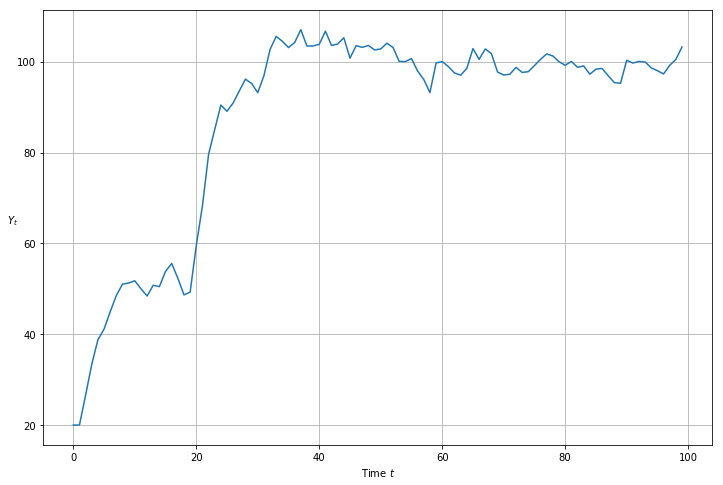

In [16]:
plot_y(y_stochastic_g(g=10, g_t=20, duration='permanent'))

We can also see the response to a one time jump in government expenditures

Roots are real and absolute values are less than zero;therefore get smooth convergence to a steady state
[ 0.7236068  0.2763932]
Roots are real
Roots are less than one


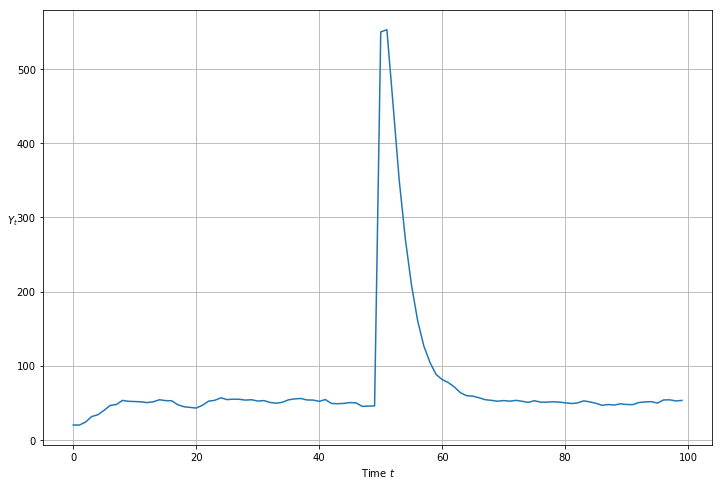

In [17]:
plot_y(y_stochastic_g(g=500, g_t=50, duration='one-off'))

## 5 Wrapping everything into a class
Now we’ll roll up our sleeves and write a Python class called Samuelson for the Samuleson model
$Y_t = + \alpha (1 + \beta) Y_{t-1} - \alpha \beta Y_{t-2}$

In [18]:
class Samuelson():
    r"""This class represents the Samuelson model, otherwise known as the
    multiple-accelerator model. The model combines the Keynesian multipler
    with the accelerator theory of investment.
    The path of output is governed by a linear second-order difference
    ,→equation
    .. math::
    Y_t = + \alpha (1 + \beta) Y_{t-1} - \alpha \beta Y_{t-2}
    Parameters
    ----------
    y_0 : scalar
    Initial condition for Y_0
    y_1 : scalar
    Initial condition for Y_1
    alpha : scalar
    Marginal propensity to consume
    beta : scalar
    Accelerator coefficient
    n : int
    Number of iterations
    sigma : scalar
    Volatility parameter. Must be greater than or equal to 0. Set
    equal to 0 for non-stochastic model.
    g : scalar
    Government spending shock
    g_t : int
    Time at which government spending shock occurs. Must be specified
    when duration != None.
    duration : {None, 'permanent', 'one-off'}
    Specifies type of government spending shock. If none, government
    spending equal to g for all t.
    """
    def __init__(self,
                y_0=100,
                y_1=50,
                alpha=1.3,
                beta=0.2,
                gamma=10,
                n=100,
                sigma=0,
                g=0,
                g_t=0,
                duration=None):
        self.y_0, self.y_1, self.alpha, self.beta = y_0, y_1, alpha, beta
        self.n, self.g, self.g_t, self.duration = n, g, g_t, duration
        self.gamma, self.sigma = gamma, sigma
        self.rho1 = alpha + beta
        self.rho2 = -beta
        self.roots = np.roots([1, -self.rho1, -self.rho2])
    def root_type(self):
        if all(isinstance(root, complex) for root in self.roots):
            return 'Complex conjugate'
        elif len(self.roots) > 1:
            return 'Double real'
        else:
            return 'Single real'
        
    def root_less_than_one(self):
        if all(abs(root) < 1 for root in self.roots):
            return True
    def solution_type(self):
        rho1, rho2 = self.rho1, self.rho2
        discriminant = rho1 ** 2 + 4 * rho2
        if rho2 >= 1 + rho1 or rho2 <= -1:
            return 'Explosive oscillations'
        elif rho1 + rho2 >= 1:
            return 'Explosive growth'
        elif discriminant < 0:
            return 'Damped oscillations'
        else:
            return 'Steady state'
        
    def _transition(self, x, t, g):
    # Non-stochastic - separated to avoid generating random series when not needed
        if self.sigma == 0:
            return self.rho1 * x[t - 1] + self.rho2 * x[t - 2] + self.gamma + g
    # Stochastic
        else:
            epsilon = np.random.normal(0, 1, self.n)
            return self.rho1 * x[t - 1] + self.rho2 * x[t - 2] + self.gamma + g + self.sigma * epsilon[t]
        
    def generate_series(self):
    # Create list and set initial conditions
        y_t = [self.y_0, self.y_1]
    # Generate y_t series
        for t in range(2, self.n):
    # No government spending
            if self.g == 0:
                y_t.append(self._transition(y_t, t))
    # Government spending (no shock)
            elif self.g != 0 and self.duration == None:
                y_t.append(self._transition(y_t, t))
    # Permanent government spending shock
            elif self.duration == 'permanent':
                if t < self.g_t:
                    y_t.append(self._transition(y_t, t, g=0))
                else:
                    y_t.append(self._transition(y_t, t, g=self.g))
    # One-off government spending shock
            elif self.duration == 'one-off':
                if t == self.g_t:
                    y_t.append(self._transition(y_t, t, g=self.g))
                else:
                    y_t.append(self._transition(y_t, t, g=0))
        return y_t
    
    def summary(self):
        print('Summary\n' + '-' * 50)
        print('Root type: ' + self.root_type())
        print('Solution type: ' + self.solution_type())
        print('Roots: ' + str(self.roots))
        if self.root_less_than_one() == True:
            print('Absolute value of roots is less than one')
        else:
            print('Absolute value of roots is not less than one')
        if self.sigma > 0:
            print('Stochastic series with sigma = ' + str(self.sigma))
        else:
            print('Non-stochastic series')
        if self.g != 0:
            print('Government spending equal to ' + str(self.g))
        if self.duration != None:
            print(self.duration.capitalize() +  ' government spending shock at t = ' + str(self.g_t))
        
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))
        ax.plot(self.generate_series())
        ax.set(xlabel='Iteration', xlim=(0, self.n))
        ax.set_ylabel('$Y_t$', rotation=0)
        ax.grid()
        # Add parameter values to plot
        paramstr = '$\\alpha=%.2f$\n$\\beta=%.2f$\n$\\gamma=%.2f$\n$\\sigma=%.2f$\n$\\rho_1=%.2f$\n$\\rho_2=%.2f$'%(self.alpha, self.beta, self.gamma, self.sigma, self.rho1,self.rho2)
        props = dict(fc='white', pad=10, alpha=0.5)
        ax.text(0.87, 0.05, paramstr, transform=ax.transAxes,
        fontsize=12, bbox=props, va='bottom')
        return fig
    def param_plot(self):
        # Uses the param_plot() function defined earlier (it is then able
        # to be used standalone or as part of the model)
        fig = param_plot()
        ax = fig.gca()
        # Add lambda values to legend
        for i, root in enumerate(self.roots):
            if isinstance(root, complex):
                operator = ['+', ''] # Need to fill operator for positive as string is split apart
                label = r'$\lambda_{0} = {1.real:.2f} {2} {1.imag:.2f}i$'.format(i+1, sam.roots[i], operator[i])
            else:
                label = r'$\lambda_{0} = {1.real:.2f}$'.format(i+1, sam.roots[i])
            ax.scatter(0, 0, 0, label=label) # dummy to add to legend
        # Add rho pair to plot
        ax.scatter(self.rho1, self.rho2, 100, 'red', '+', label=r'$(\ \rho_1,\ \rho_2 \ )$', zorder=5)
        plt.legend(fontsize=12, loc=3)
        return fig
 
            
            
            
            
            
            
            
            

### Illustration of Samuelson class
Now we’ll put our Samuelson class to work on an example

In [19]:
sam = Samuelson(alpha=0.8, beta=0.5, sigma=2, g=10, g_t=20, duration='permanent')
sam.summary()


Summary
--------------------------------------------------
Root type: Complex conjugate
Solution type: Damped oscillations
Roots: [ 0.65+0.27838822j  0.65-0.27838822j]
Absolute value of roots is less than one
Stochastic series with sigma = 2
Government spending equal to 10
Permanent government spending shock at t = 20


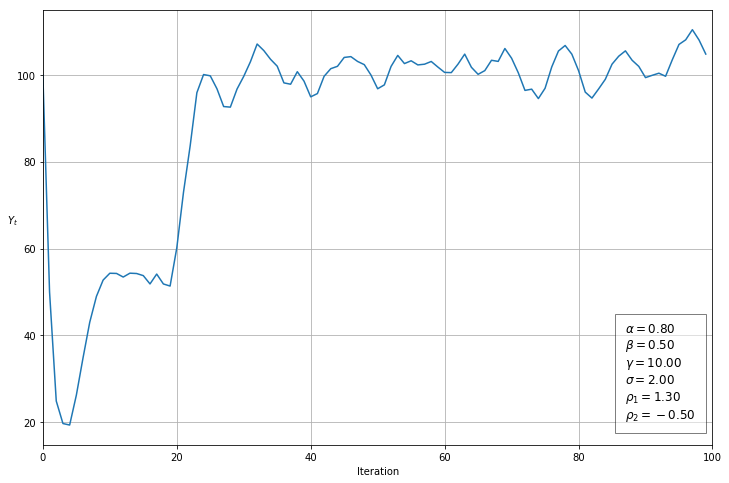

In [20]:
sam.plot()
plt.show()


### Using the graph
We’ll use our graph to show where the roots lie and how their location is consistent with the behavior of the path just graphed
The red $+$ sign shows the location of the roots

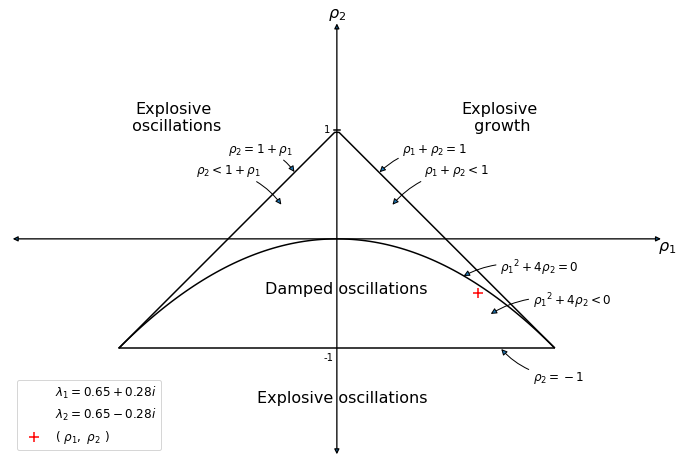

In [21]:
sam.param_plot()
plt.show()


## 6 Using the LinearStateSpace class
Here is how we map the Samuelson model into an instance of a LinearStateSpace class

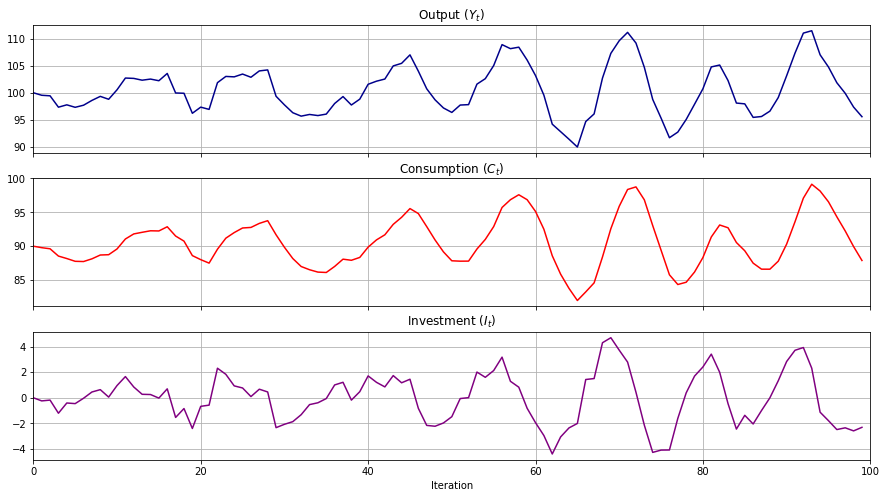

In [22]:

from quantecon import LinearStateSpace  ##要安装这个包
""" This script maps the Samuelson model in the the LinearStateSpace class"""
alpha = 0.8
beta = 0.9
rho1 = alpha + beta
rho2 = -beta
gamma = 10
sigma = 1
g = 10
n = 100

A = [[1, 0, 0],
    [gamma + g, rho1, rho2],
    [0, 1, 0]]
G = [[gamma + g, rho1, rho2], # this is Y_{t+1}
    [gamma, alpha, 0], # this is C_{t+1}
    [0, beta, -beta]] # this is I_{t+1}
mu_0 = [1, 100, 100]
C = np.zeros((3,1))
C[1] = sigma # stochastic

sam_t = LinearStateSpace(A, C, G, mu_0=mu_0)

x, y = sam_t.simulate(ts_length=n)

fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15, 8))
titles = ['Output ($Y_t$)', 'Consumption ($C_t$)', 'Investment ($I_t$)']
colors = ['darkblue', 'red', 'purple']
for ax, series, title, color in zip(axes, y, titles, colors):
    ax.plot(series, color=color)
    ax.set(title=title, xlim=(0, n))
    ax.grid()
axes[-1].set_xlabel('Iteration')
plt.show()







### Other methods in the LinearStateSpace class

Let’s plot impulse response functions for the instance of the Samuelson model using a method in the LinearStateSpace class

In [23]:
imres = sam_t.impulse_response()
imres = np.asarray(imres)
y1 = imres[:, :, 0]
y2 = imres[:, :, 1]
y1.shape


Now let’s compute the zeros of the characteristic polynomial by simply calculating the eigenvalues of A

In [24]:
A = np.asarray(A)
w, v = np.linalg.eig(A)
print(w)


[ 0.85+0.42130749j  0.85-0.42130749j  1.00+0.j        ]


### Inheriting methods from LinearStateSpace
We could also create a subclass of LinearStateSpace (inheriting all its methods and attributes) to add more functions to use

In [25]:
class SamuelsonLSS(LinearStateSpace):
    """
    this subclass creates a Samuelson multiplier-accelerator model
    as a linear state space system
    """
    def __init__(self,
                y_0=100,
                y_1=100,
                alpha=0.8,
                beta=0.9,
                gamma=10,
                sigma=1,
                g=10):
        self.alpha, self.beta = alpha, beta
        self.y_0, self.y_1, self.g = y_0, y_1, g
        self.gamma, self.sigma = gamma, sigma
        
        # Define intial conditions
        self.mu_0 = [1, y_0, y_1]
        self.rho1 = alpha + beta
        self.rho2 = -beta
        # Define transition matrix
        self.A = [[1, 0, 0],
                [gamma + g, self.rho1, self.rho2],
                [0, 1, 0]]
        
     # Define output matrix
        self.G = [[gamma + g, self.rho1, self.rho2], # this is Y_{t+1}
                [gamma, alpha, 0], # this is C_{t+1}
                [0, beta, -beta]] # this is I_{t+1}
        self.C = np.zeros((3, 1))
        self.C[1] = sigma # stochastic
        
        # Initialize LSS with parameters from Samuleson model
        LinearStateSpace.__init__(self, self.A, self.C, self.G, mu_0=self.mu_0)
        
    def plot_simulation(self, ts_length=100, stationary=True):
        # Temporarily store original parameters
        temp_mu = self.mu_0
        temp_Sigma = self.Sigma_0
        # Set distribution parameters equal to their stationary values for simulation
        if stationary == True:
            try:
                self.mu_x, self.mu_y, self.sigma_x, self.sigma_y = self.stationary_distributions()
                self.mu_0 = self.mu_y
                self.Sigma_0 = self.sigma_y
            # Exception where no convergence achieved when calculating stationary distributions
            except ValueError:
                print('Stationary distribution does not exist')

        x, y = self.simulate(ts_length)
        fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15, 8))
        titles = ['Output ($Y_t$)', 'Consumption ($C_t$)', 'Investment ($I_t$)']
        colors = ['darkblue', 'red', 'purple']
        for ax, series, title, color in zip(axes, y, titles, colors):
            ax.plot(series, color=color)
            ax.set(title=title, xlim=(0, n))
            ax.grid()

        axes[-1].set_xlabel('Iteration')

            # Reset distribution parameters to their initial values
        self.mu_0 = temp_mu
        self.Sigma_0 = temp_Sigma
        return fig
    
    def plot_irf(self, j=5):
        x, y = self.impulse_response(j)
        # Reshape into 3 x j matrix for plotting purposes
        yimf = np.array(y).flatten().reshape(j+1, 3).T
        fig, axes = plt.subplots(3, 1, sharex=True, figsize=(15, 8))
        labels = ['$Y_t$', '$C_t$', '$I_t$']
        colors = ['darkblue', 'red', 'purple']
        for ax, series, label, color in zip(axes, yimf, labels, colors):
            ax.plot(series, color=color)
            ax.set(xlim=(0, j))
            ax.set_ylabel(label, rotation=0, fontsize=14, labelpad=10)
            ax.grid()
            axes[0].set_title('Impulse Response Functions')
            axes[-1].set_xlabel('Iteration')
        return fig
        
    def multipliers(self, j=5):
        x, y = self.impulse_response(j)
        return np.sum(np.array(y).flatten().reshape(j+1, 3), axis=0)

### Illustrations
Let’s show how we can use the SamuelsonLSS

In [26]:
samlss = SamuelsonLSS()


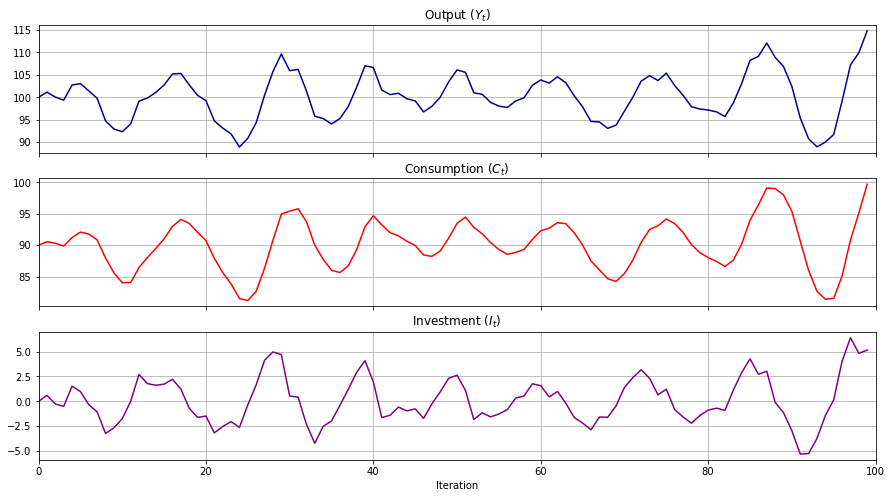

In [27]:
samlss.plot_simulation(100, stationary=False)
plt.show()

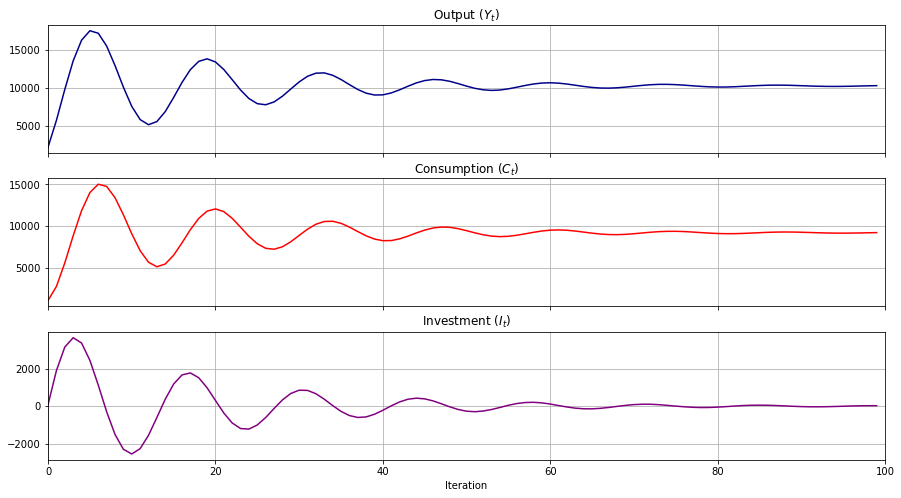

In [28]:
samlss.plot_simulation(100, stationary=True)
plt.show()


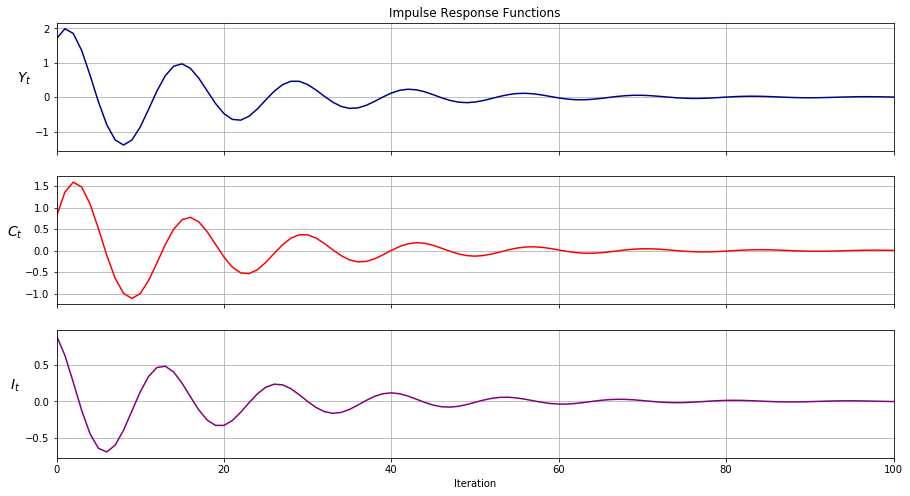

In [29]:
samlss.plot_irf(100)  # 脉冲反应函数
plt.show()


In [30]:
samlss.multipliers()


array([ 7.414389,  6.835896,  0.578493])

In [31]:
pure_multiplier = SamuelsonLSS(alpha=0.8, beta=0)


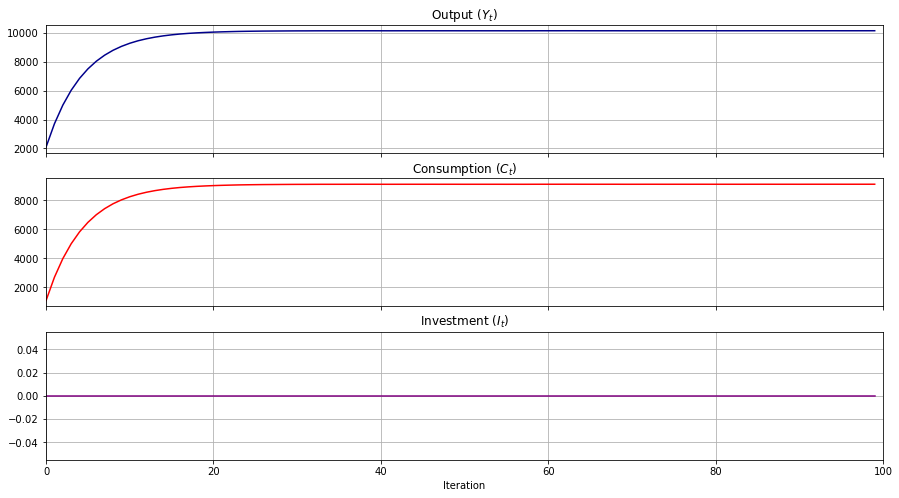

In [32]:
pure_multiplier.plot_simulation()


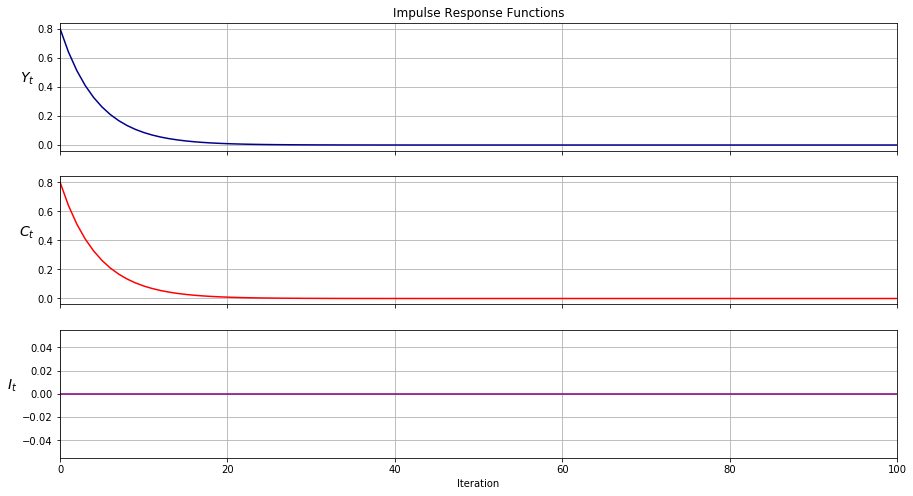

In [33]:
pure_multiplier.plot_irf(100)